In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home/babyostrich/Repos/Omega500AnalysisTools/')
import omega500analysistools.IO.load_db as load_db

from astropy.cosmology import WMAP5

In [2]:
def get_lookback_time(aexp) :
    '''Return array of lookback time in Gyrs (e.g. aexp=0.7 corresponds to ~4.5 Gyr in look back time)'''
    z = 1./aexp - 1.
    return WMAP5.lookback_time(z).value

In [3]:
#db_dir = '/home/babyostrich/data/databases/ErwinGoogle/analysis/database/'
db_NR='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_NR_0.db'
db_CSF='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_CSF_0.db'
db_AGN='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_AGN_0.db'

In [4]:
# Load the databases
NR_df = load_db.return_table(db_NR)
CSF_df = load_db.return_table(db_CSF)
AGN_df = load_db.return_table(db_AGN)


In [5]:
print(NR_df.keys())
NR_df['halos'].columns

dict_keys(['profiles', 'mergers', 'mergertree', 'halos'])


Index(['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'r_hc', 'M_hc', 'num_particles',
       'vmax_hc', 'rmax_hc', 'aexp', 'r200m', 'M_dark_200m', 'M_gas_200m',
       'M_gas_cold_200m', 'M_star_200m', 'M_star_new_200m', 'M_baryon_200m',
       'M_total_200m', 'vmax_200m', 'rmax_200m', 'gas-Z_II_avg_200m',
       'gas-Z_Ia_avg_200m', 'star-Z_II_avg_200m', 'star-Z_Ia_avg_200m',
       'star_new-Z_II_avg_200m', 'star_new-Z_Ia_avg_200m', 'star-age_avg_200m',
       'r500c', 'M_dark_500c', 'M_gas_500c', 'M_gas_cold_500c', 'M_star_500c',
       'M_star_new_500c', 'M_baryon_500c', 'M_total_500c', 'vmax_500c',
       'rmax_500c', 'gas-Z_II_avg_500c', 'gas-Z_Ia_avg_500c',
       'star-Z_II_avg_500c', 'star-Z_Ia_avg_500c', 'star_new-Z_II_avg_500c',
       'star_new-Z_Ia_avg_500c', 'star-age_avg_500c', 'r200c', 'M_dark_200c',
       'M_gas_200c', 'M_gas_cold_200c', 'M_star_200c', 'M_star_new_200c',
       'M_baryon_200c', 'M_total_200c', 'vmax_200c', 'rmax_200c',
       'gas-Z_II_avg_200c', 'gas-Z_Ia_a

In [6]:
# List all aexps for looping later
AGN_aexps = AGN_df['halos'].aexp.unique()
CSF_aexps = CSF_df['halos'].aexp.unique()
NR_aexps = NR_df['halos'].aexp.unique()

In [7]:
# Selecting based on redshift
def values_at_aexp(df, aexp, field) :
    df_at_aexp = df.loc[df['aexp'] == aexp]
    return df_at_aexp[field]

# Selecting based on mass bin
def values_in_massbin(df, mass_min, mass_max, field, mass_field='M_total_500c') :
    df_in_bin = df.loc[(df[mass_field] > mass_min) & (df[mass_field] <= mass_max)]
    return df_in_bin[field]

# Define mass bins by quantiles
def get_field_edge_pairs(df_column, quantiles=[0,.25,.5,1.]) :
    field_edges = pd.qcut(df_column,[0.,0.25,0.5,1.],retbins=True)[1]
    return zip(field_edges[:-1], field_edges[1:])

def get_subdfs_in_quantiles(df, quantiles=[0.,.25,.5,1.], field_to_cut_on='M_total_500c') :
    # Returns dataframe separated in a list corresponding to field bin edges
    field_edge_pairs = get_field_edge_pairs(df[field_to_cut_on], quantiles=quantiles)
    return [ df.loc[(df[field_to_cut_on] > field_edge_pair[0]) & (df[field_to_cut_on] <= field_edge_pair[1])] \
            for field_edge_pair in field_edge_pairs ]
        
def fbaryon(aexp) :
    z = 1./aexp - 1.
    return WMAP5.Ob(z)/WMAP5.Om(z)

# Plot $f_*$ and $f_{*,new}$ as a function of redshift and in different mass bins

In [8]:
# Create new fields for f* and f*,new
for df in [AGN_df,CSF_df] :
    df['halos']['f_star_500c'] = df['halos']['M_star_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_200m'] = df['halos']['M_star_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_cold_500c'] = df['halos']['M_gas_cold_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_cold_200m'] = df['halos']['M_gas_cold_200m']/df['halos']['M_total_200m']
    df['halos']['f_star_new_500c'] = df['halos']['M_star_new_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_new_200m'] = df['halos']['M_star_new_200m']/df['halos']['M_total_200m']
    df['halos']['f_baryon_normalization'] = fbaryon(df['halos']['aexp'])

for df in [AGN_df, CSF_df, NR_df] :
    df['halos']['f_baryon_500c'] = df['halos']['M_baryon_500c']/df['halos']['M_total_500c']
    df['halos']['f_baryon_200m'] = df['halos']['M_baryon_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_500c'] = df['halos']['M_gas_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_200m'] = df['halos']['M_gas_200m']/df['halos']['M_total_200m']
    

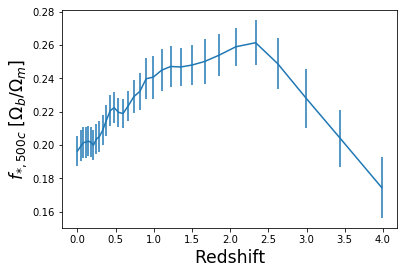

In [9]:
# Test figure for f*500c as a function of redshift

xvals = 1./AGN_aexps - 1.
yvals_all = [ values_at_aexp(AGN_df['halos'], aexp, 'f_star_500c') for aexp in AGN_aexps ]
yvals = [ yval.mean() for yval in yvals_all ]
yvals_err = [ yval.std() for yval in yvals_all ]
plt.errorbar(xvals, [yval/fbaryon(1.) for yval in yvals], yvals_err,label='AGN')
plt.xlabel('Redshift',fontsize='xx-large')
plt.ylabel('$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$',fontsize='xx-large')

In [10]:
# from : https://tonysyu.github.io/plotting-error-bars.html#.WzKNKR9yvCI
def errorfill(x, y, yerr, alpha_fill=0.1, ax=None, **kw):
    x = np.array(x)
    y = np.array(y)
    yerr = np.array(yerr)
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    p = plt.plot(x, y, **kw)
    color = p[0].get_color()
    plt.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    
plot_function = {'errorbar': plt.errorbar, 'errorfill': errorfill}

# Function to create fbar normalized figures
def plot_fbarnorm_evolution(dfs, field, df_labels, ylabel, plot_fcn_name='errorfill') :
    '''Plot several dataframes of field evolution (e.g. AGN and CSF)'''
    for df, df_label in zip(dfs,df_labels) :
        aexps = df.aexp.unique()
        redshifts = 1./aexps - 1.
        yvals_all = [ values_at_aexp(df, aexp, field) for aexp in aexps ]
        yvals = [ yval.mean() for yval in yvals_all ]
        yvals_err = [ yval.std() for yval in yvals_all ]
        plot_function[plot_fcn_name](redshifts, [yval/fbaryon(1.) for yval in yvals], [yval_err/fbaryon(1.) for yval_err in yvals_err],label=df_label)
    plt.xlabel('Redshift',fontsize='xx-large')
    plt.ylabel(ylabel,fontsize='xx-large')
    # plt.xscale('log')
    plt.legend()

# Function to create evolution plot
def plot_evolution(dfs, field, df_labels, ylabel, ylog=False, plot_fcn_name='errorfill') :
    '''Plot several dataframes of field evolution (e.g. AGN and CSF)'''
    for df, df_label in zip(dfs,df_labels) :
        aexps = df.aexp.unique()
        redshifts = 1./aexps - 1.
        yvals_all = [ values_at_aexp(df, aexp, field) for aexp in aexps ]
        yvals = [ yval.mean() for yval in yvals_all ]
        yvals_err = [ yval.std() for yval in yvals_all ]
        plot_function[plot_fcn_name](redshifts, yvals, yvals_err,label=df_label)
    plt.xlabel('Redshift',fontsize='xx-large')
    plt.ylabel(ylabel,fontsize='xx-large')
    if ylog: plt.yscale('log')
    plt.legend()


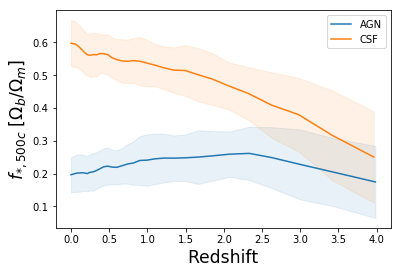

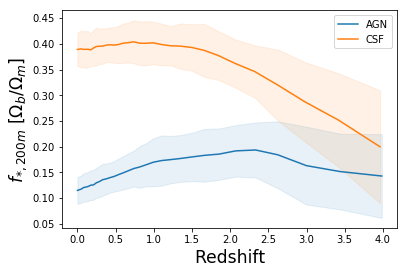

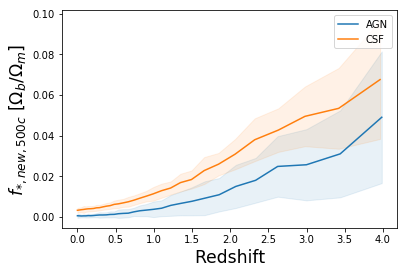

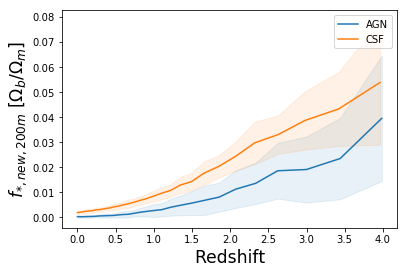

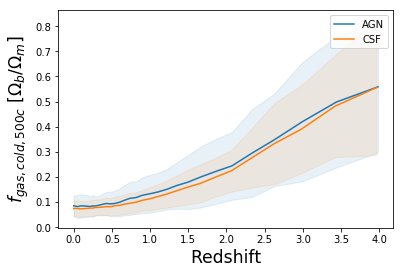

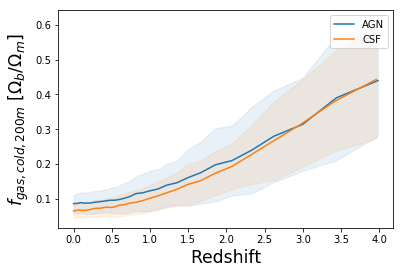

In [11]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df['halos'],CSF_df['halos']], field, ['AGN','CSF'], label)
    plt.show()

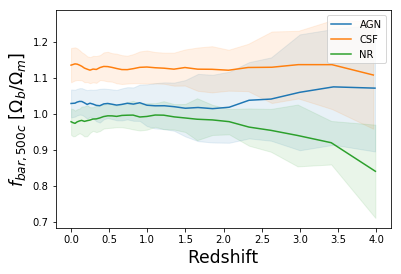

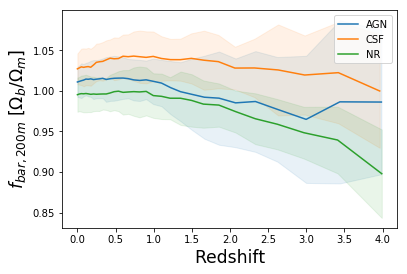

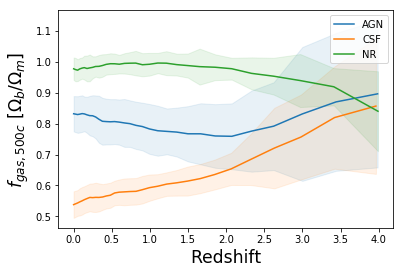

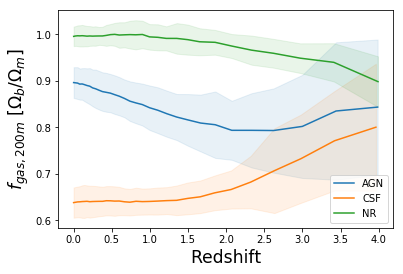

In [12]:
# Let's plot quantities where we can compare AGN, CSF, and NR
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df['halos'],CSF_df['halos'],NR_df['halos']], field, ['AGN','CSF','NR'], 
                            label, plot_fcn_name='errorfill')
    plt.show()

# Creating cuts on median or quartiles

In [13]:
def create_quantile_cut_label(df, num_quantiles, quantile_labels, quantile_cut_label_name, groupby='aexp',
                                 column_to_cut='M_total_500c') :
    
    
    df[quantile_cut_label_name] = df.groupby(groupby)[column_to_cut].transform(pd.qcut,
                                                                               num_quantiles,
                                                                               labels=quantile_labels,
                                                                                  duplicates='drop')


# Create cut on median mass at each aexp
for df, df_name in zip([AGN_df['halos'], CSF_df['halos']],['AGN','CSF']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_M500c_cut_at_aexp', groupby='aexp', 
                              column_to_cut='M_total_500c')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos'], CSF_df['halos']],['AGN','CSF']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_M500c_cut_at_aexp', 
                              groupby='aexp', 
                              column_to_cut='M_total_500c')


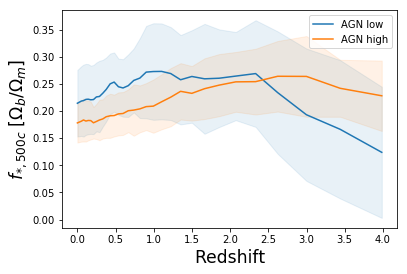

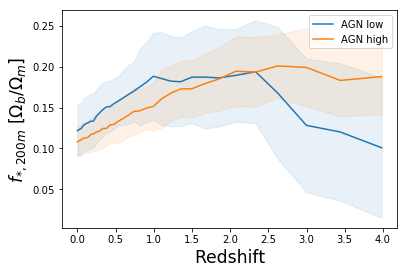

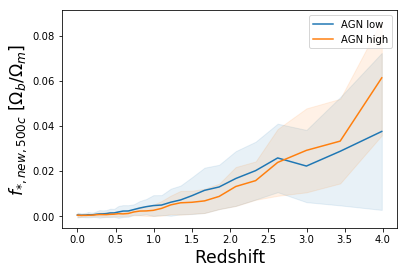

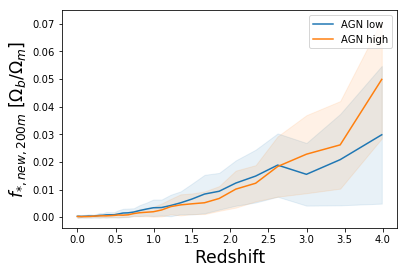

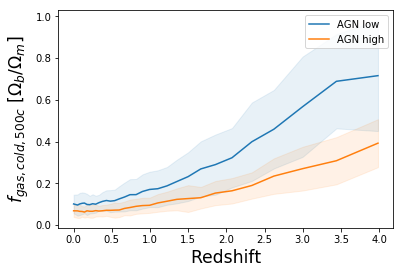

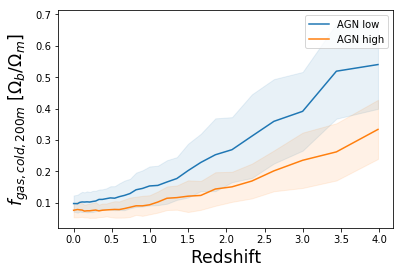

In [14]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

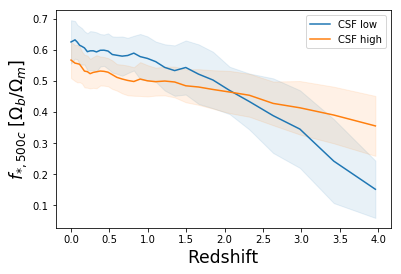

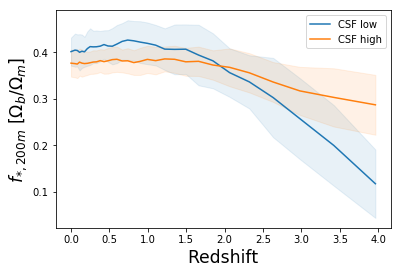

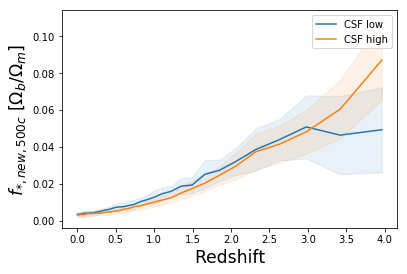

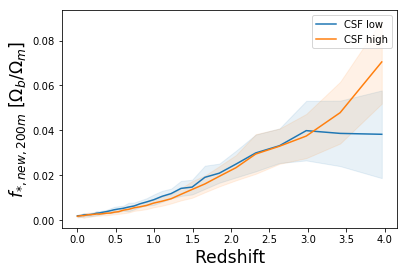

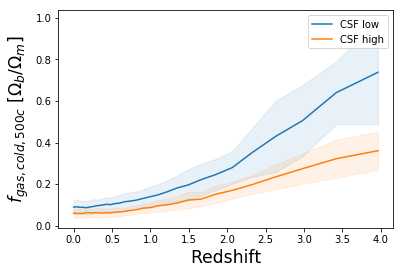

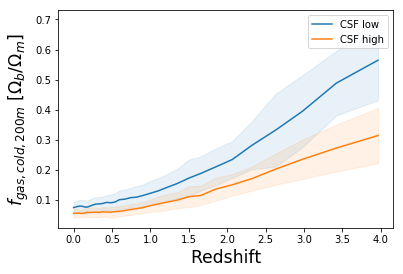

In [15]:
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()


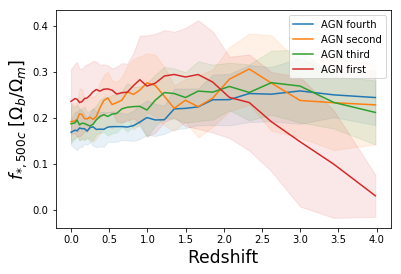

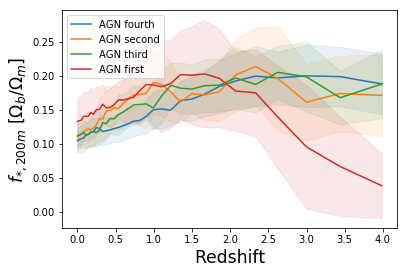

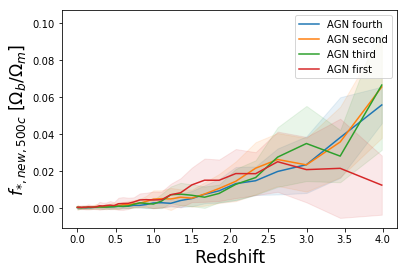

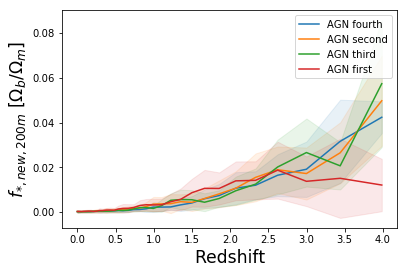

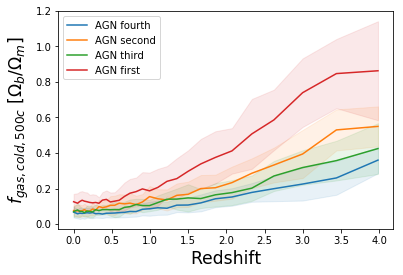

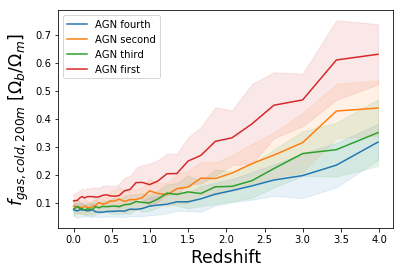

In [16]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

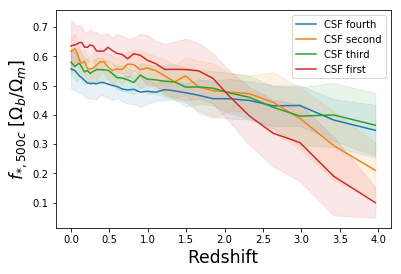

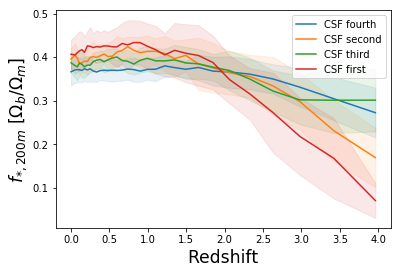

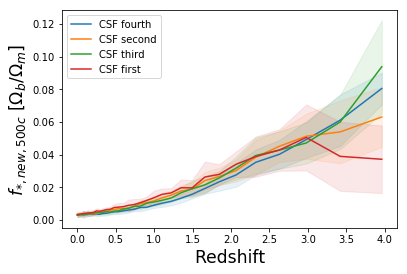

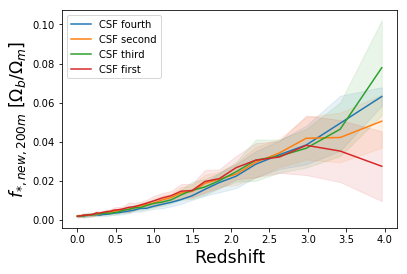

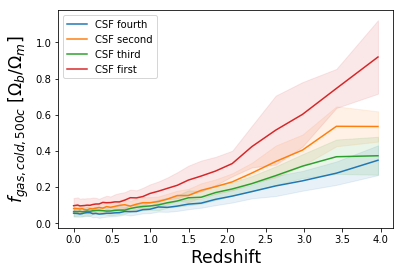

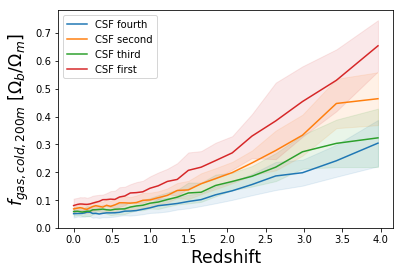

In [17]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

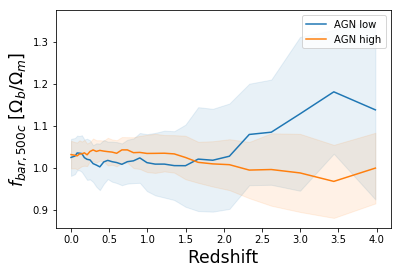

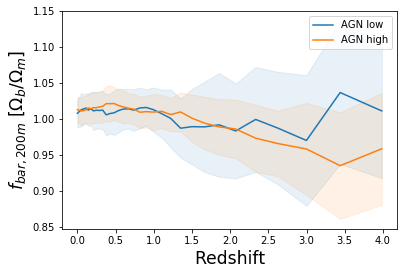

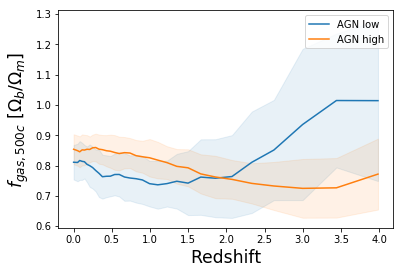

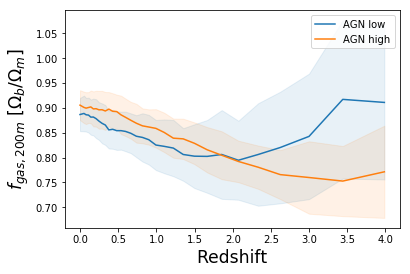

In [18]:
# Let's plot quantities where we can compare AGN, CSF, and NR - Note: NR cuts went wrong (bug in masses???)
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

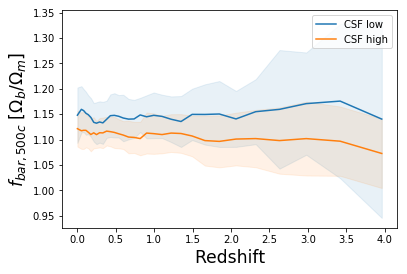

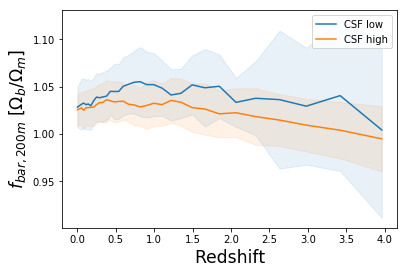

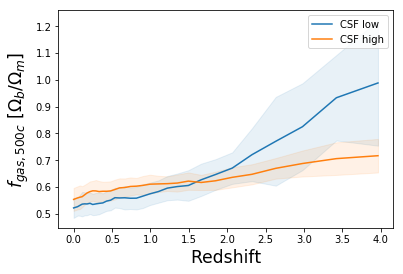

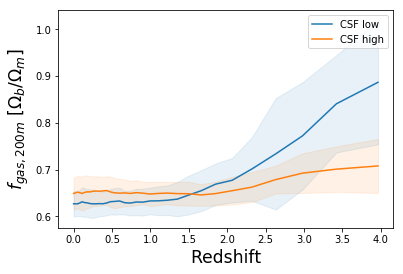

In [19]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

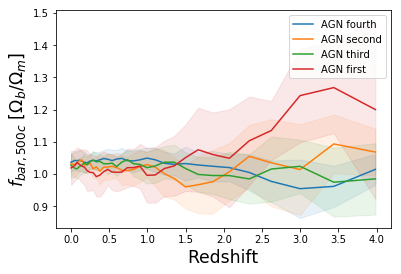

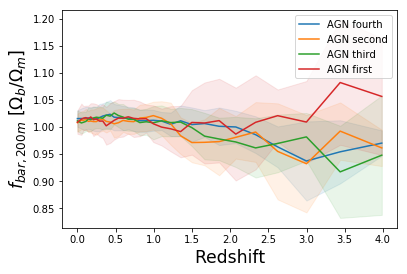

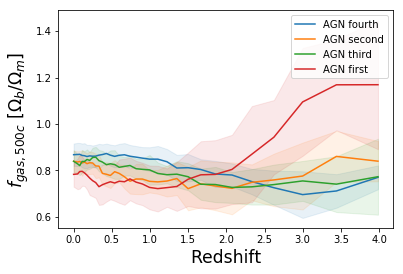

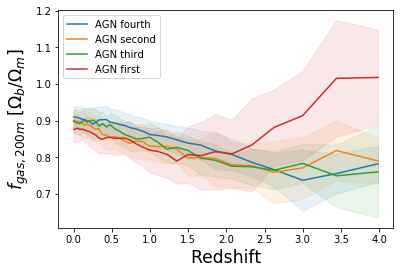

In [20]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

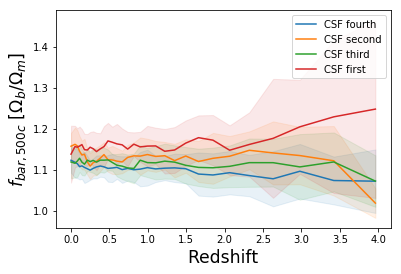

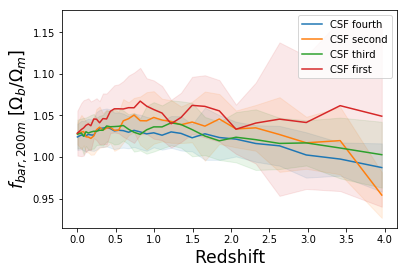

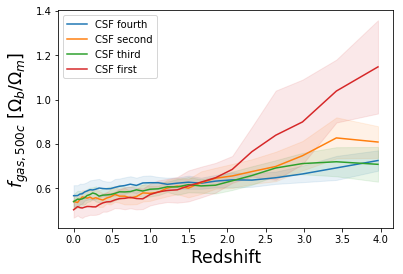

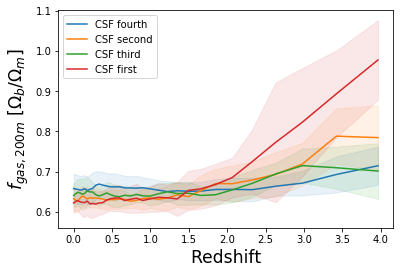

In [21]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

# Cuts on z=0 mass bins and comparison to average mass growth

In [22]:
def get_z0_masses(df, masskey) :
    # Create dictionary for z0_parent_mass
    aexp0 = max(df.aexp.unique())
    return df.loc[df['aexp']==aexp0].set_index('id').to_dict()[masskey]

for df in [AGN_df, CSF_df, NR_df] :
    # Rename mergertree columns to enable the merge
    df['mergertree'].rename(columns = {'parent_id':'id', 'parent_aexp':'aexp'}, inplace = True)
    
    # Will need to merge on 'child_id' and 'child_aexp' corresponding to 'id' and 'aexp' from halos, and z0_parent_id is what we want.  
    df['halos_and_mergertree'] = pd.merge(df['halos'].loc[df['halos']['is_main_halo']==1], df['mergertree'].loc[df['mergertree']['is_main_line'] == 1], on=['id','aexp'])
    
    for masskey in ['M_total_500c', 'M_total_200m'] :
        z0mass_dict = get_z0_masses(df['halos_and_mergertree'], masskey=masskey)
        df['halos_and_mergertree']['z0_'+masskey] = df['halos_and_mergertree']['z0_parent_id'].map(z0mass_dict)
        

# Create cut on median mass at z0
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree'], NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_M500c_cut_at_z0', groupby='aexp', 
                              column_to_cut='z0_M_total_500c')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree'],NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_M500c_cut_at_z0', 
                              groupby='aexp', 
                              column_to_cut='z0_M_total_500c')
    

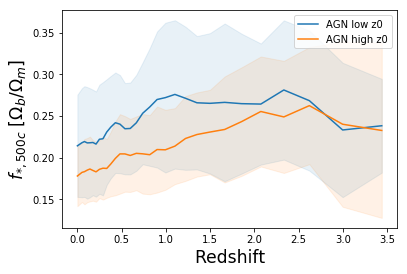

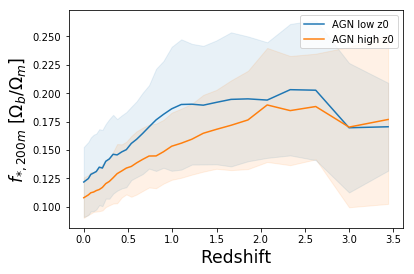

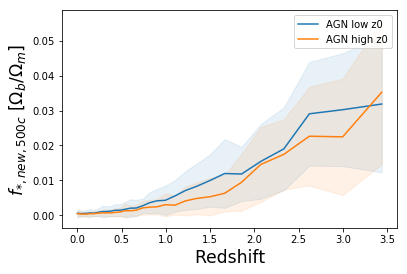

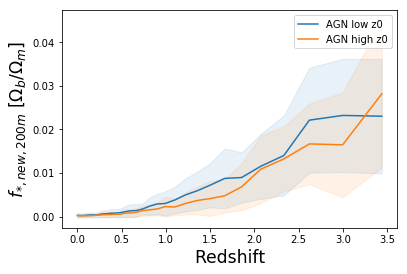

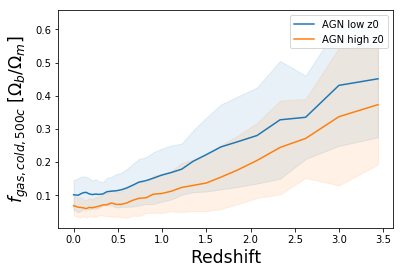

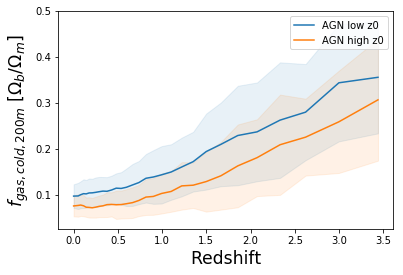

In [23]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

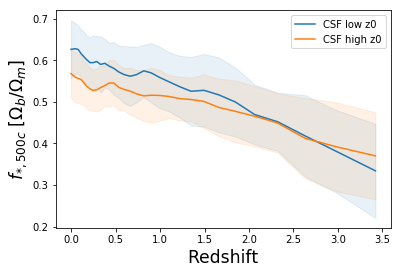

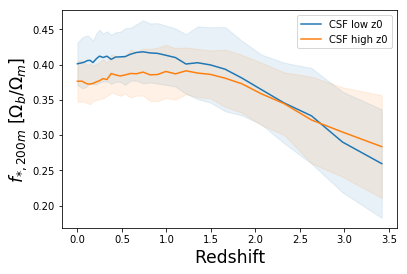

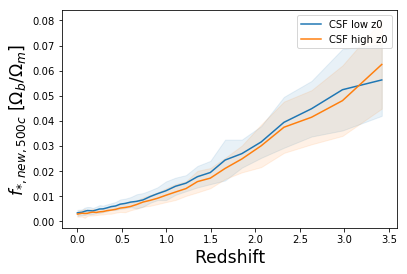

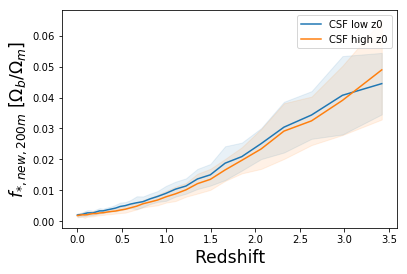

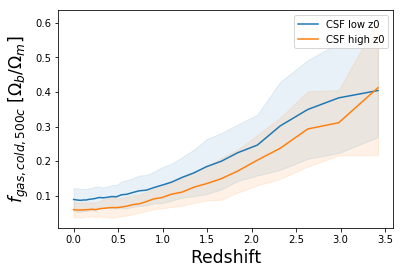

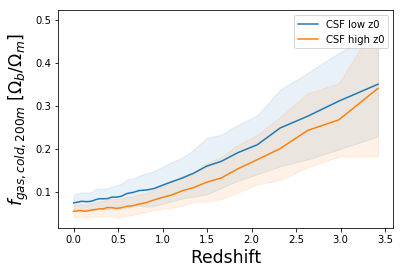

In [24]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()

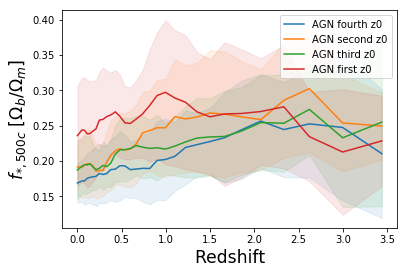

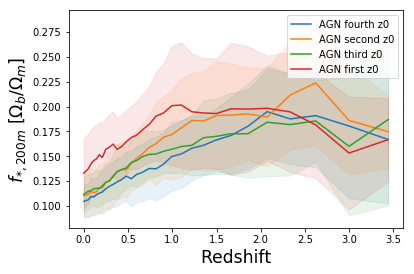

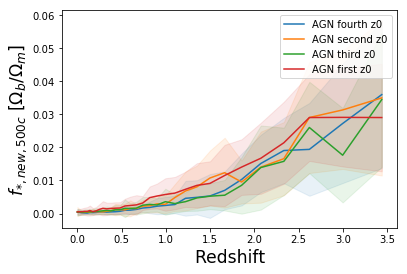

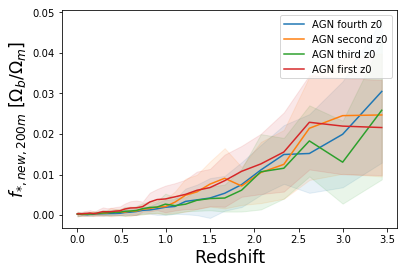

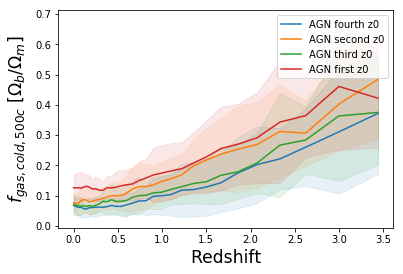

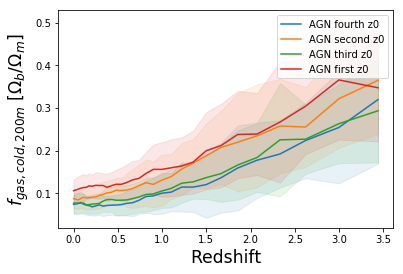

In [25]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

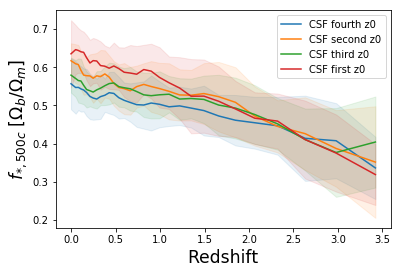

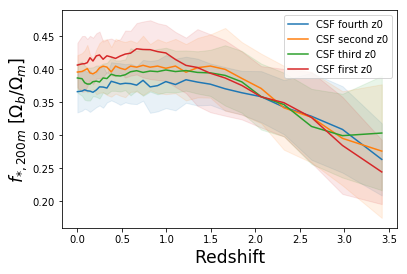

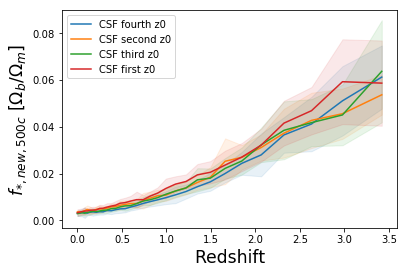

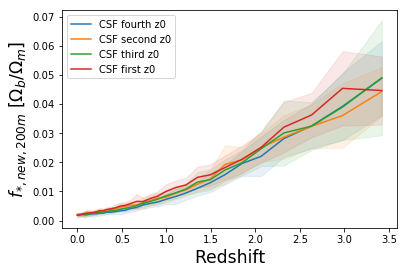

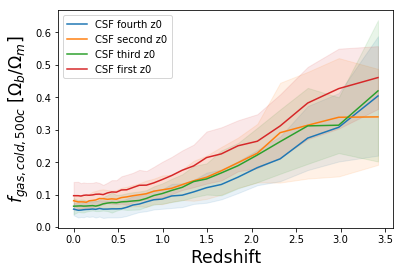

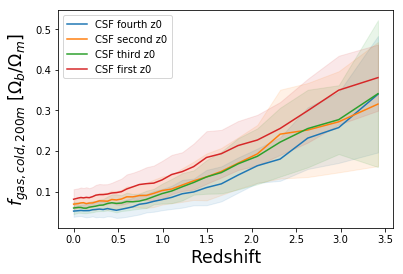

In [26]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()

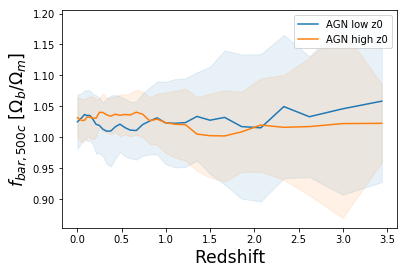

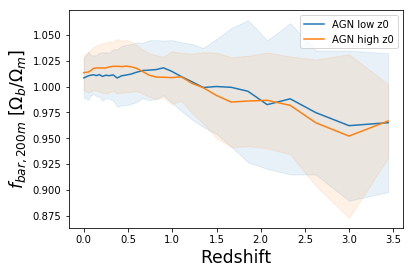

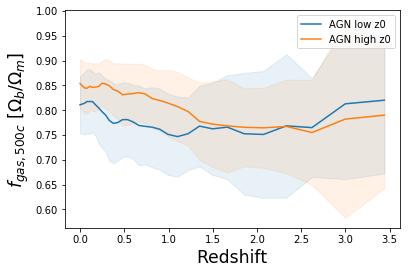

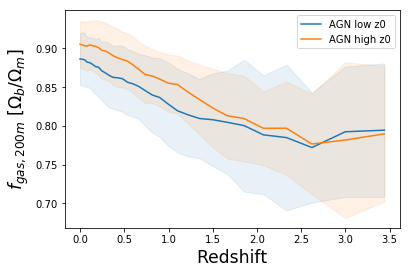

In [27]:
# Let's plot quantities where we can compare AGN, CSF, and NR - Note: NR cuts went wrong (bug in masses???)
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

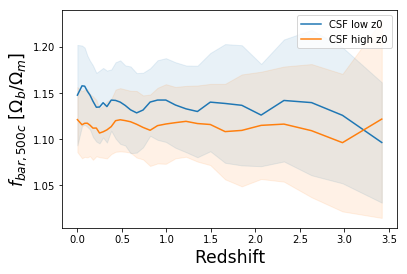

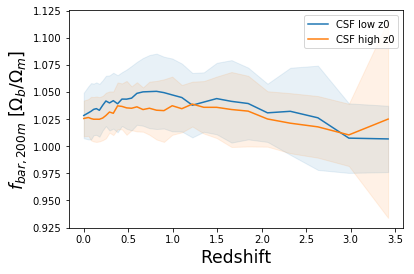

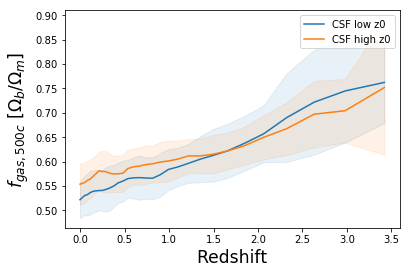

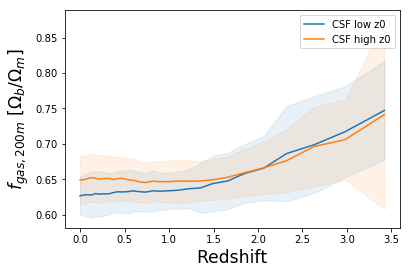

In [28]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()

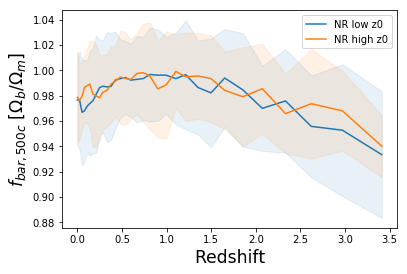

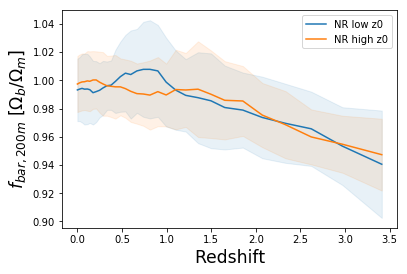

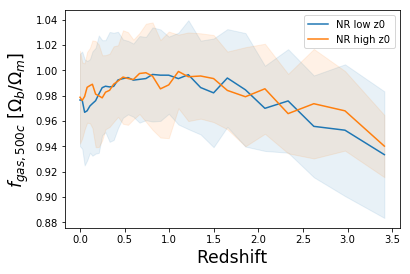

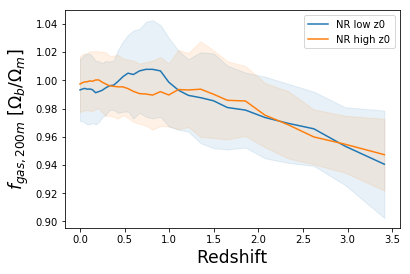

In [29]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' z0' for g in gbs], label)
    plt.show()

# Average mass growth comparison

In [30]:
# Let's calculate mass growth with respect to z0 mass
for df in [AGN_df, CSF_df, NR_df] :
    for masskey in ['M_total_500c', 'M_total_200m'] :
        df['halos_and_mergertree']['z0_'+masskey+'_fraction'] = \
            df['halos_and_mergertree'][masskey]/df['halos_and_mergertree']['z0_'+masskey]


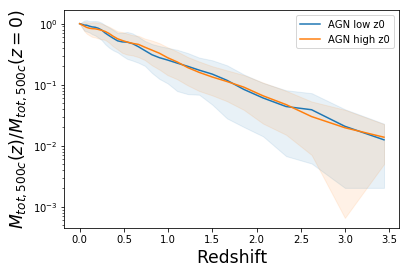

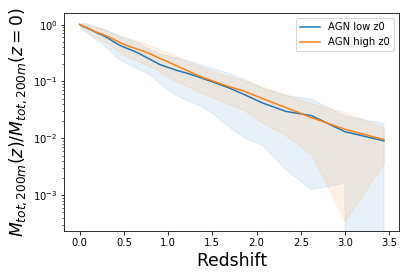

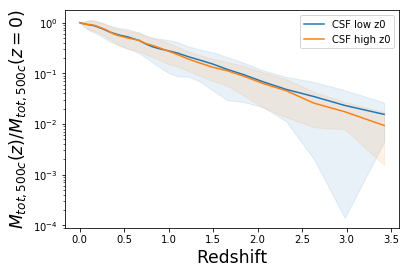

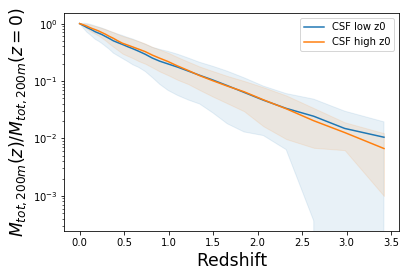

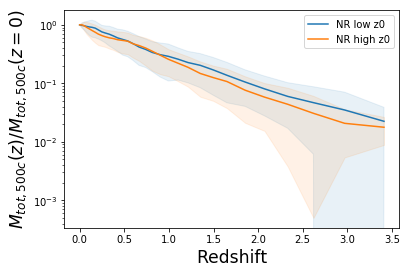

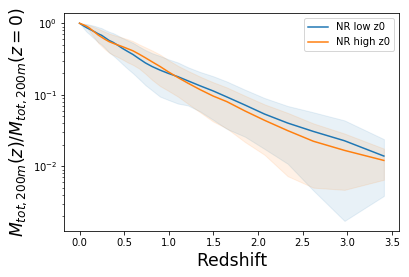

In [31]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['z0_M_total_500c_fraction','z0_M_total_200m_fraction']
labels = ['$M_{tot,500c}(z)/M_{tot,500c}(z=0)$', '$M_{tot,200m}(z)/M_{tot,200m}(z=0)$']

# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()
    
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()

for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()


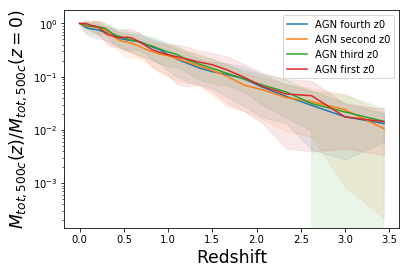

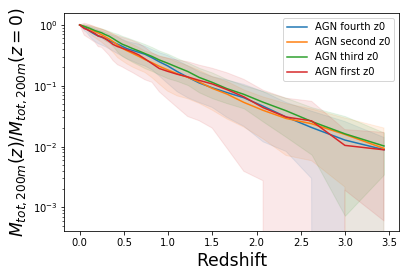

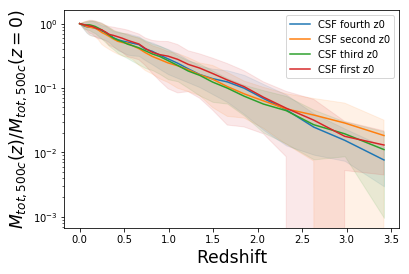

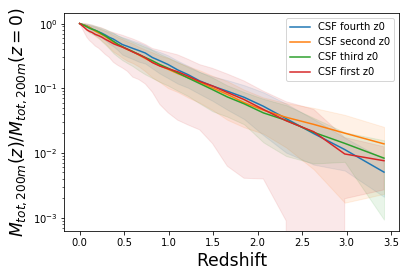

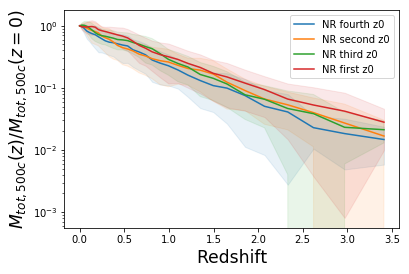

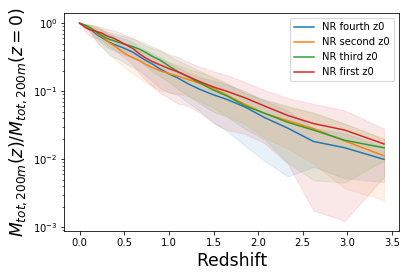

In [32]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()
    
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()

for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' z0' for g in gbs], label, ylog=True)
    plt.show()


# Cuts on recent accretion and mode of mergers 
(1) Identify the aexp = 0.7 progenitor of a z0 id and its mass, add a column of aexp07_M_total_500c and aexp07_M_total_200m 

In [33]:
# Create dictionary for z0_parent_mass
def get_aexp_masses(df, masskey, aexp) :
    '''Returns a dictionary with z0_parent_id as the key, and the masskey as the value'''
    aexps = df.aexp.unique()
    aexpi = aexps[np.abs(aexps - aexp).argmin()]
    # Identify the mass at aexp closest to the function argument
    return df.loc[df['aexp']==aexpi].set_index('z0_parent_id').to_dict()[masskey]

# Create new columns for aexp=0.7 masses
for df in [AGN_df, CSF_df, NR_df] :
    for masskey in ['M_total_500c', 'M_total_200m'] :
        a07mass_dict = get_aexp_masses(df['halos_and_mergertree'], masskey=masskey, aexp=0.7)
        # Create new column with values that are the aexp~0.7 mass, accessed by the z0_parent_id in a07mass_dict.
        df['halos_and_mergertree']['aexp07_'+masskey] = df['halos_and_mergertree']['z0_parent_id'].map(a07mass_dict)

        # Calculate gamma
        df['halos_and_mergertree']['Gamma07_'+masskey] = \
            -( np.log(df['halos_and_mergertree']['z0_'+masskey]) - \
                 np.log(df['halos_and_mergertree']['aexp07_'+masskey]) ) / np.log(0.7)
            
            
# Create cut on median Gamma07_M_total_200m at z0
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree'], NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_Gamma07_M200m_at_z0', groupby='aexp', 
                              column_to_cut='Gamma07_M_total_200m')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree'],NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_Gamma07_M200m_at_z0', 
                              groupby='aexp', 
                              column_to_cut='Gamma07_M_total_200m')


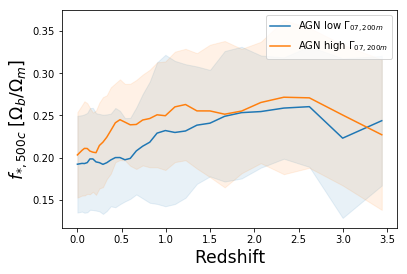

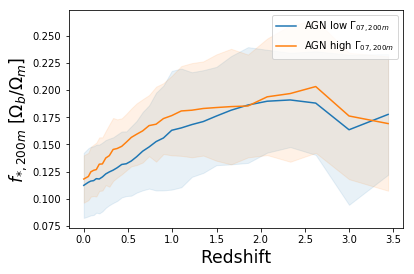

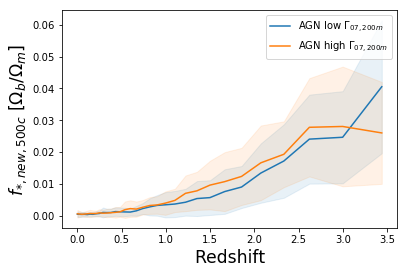

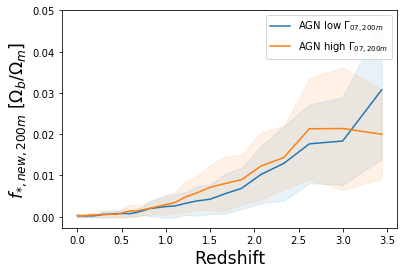

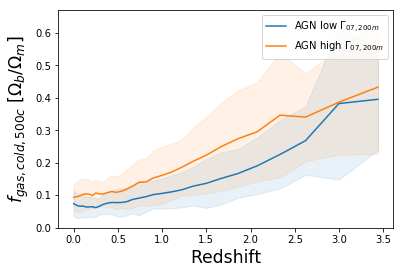

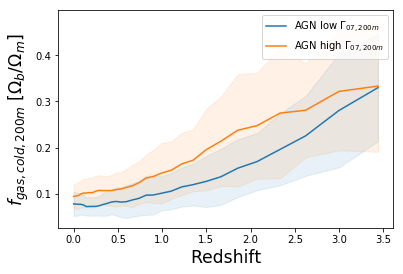

In [34]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

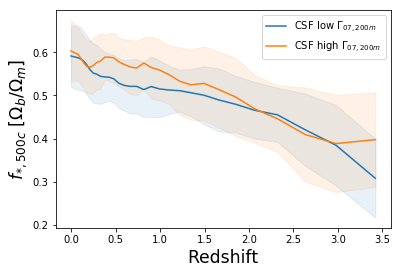

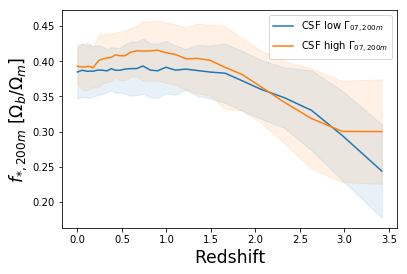

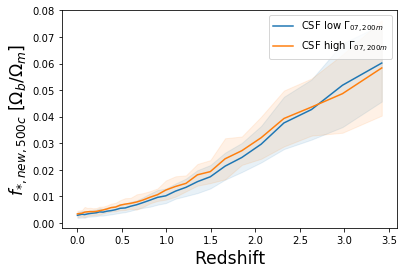

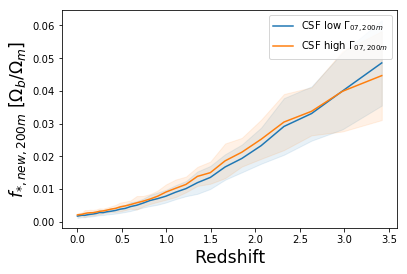

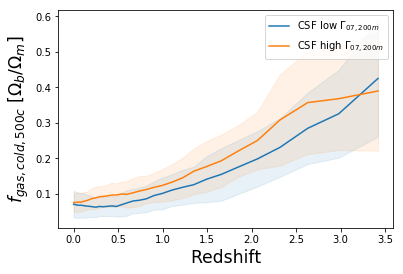

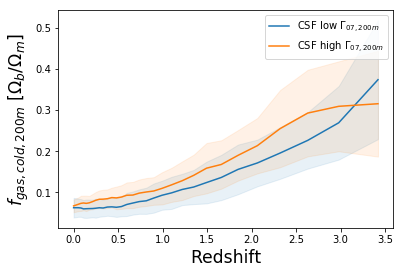

In [35]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

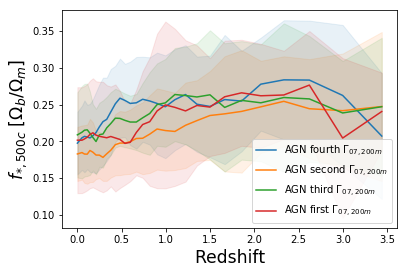

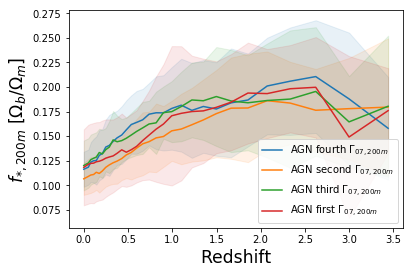

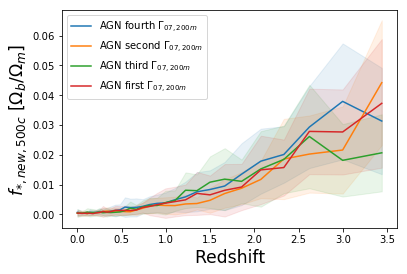

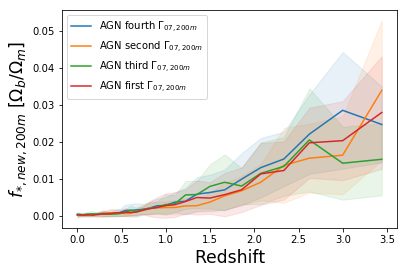

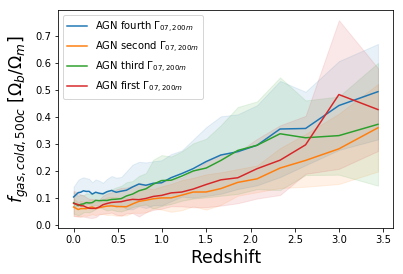

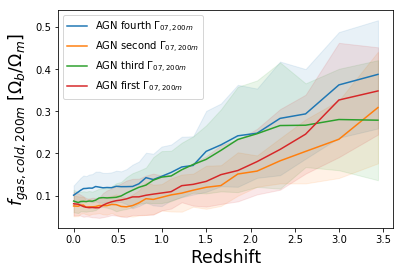

In [36]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

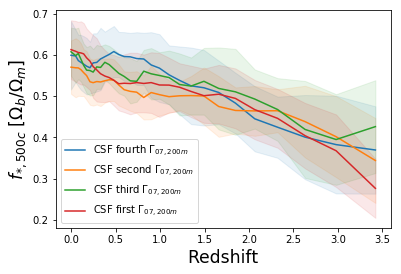

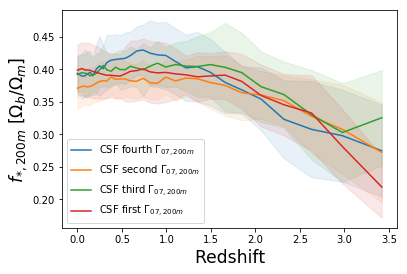

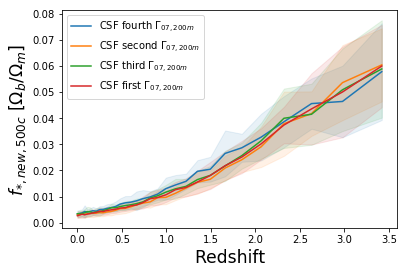

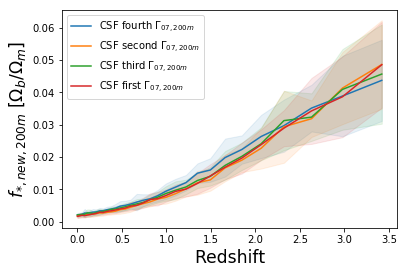

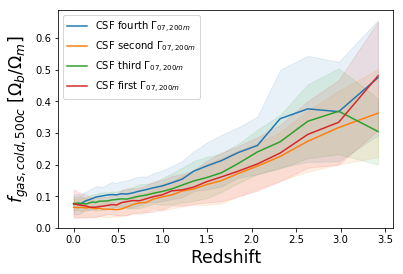

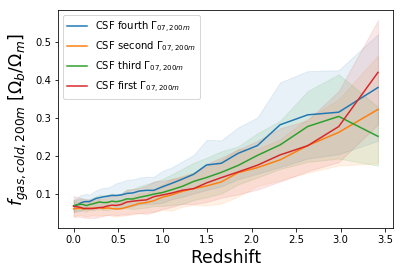

In [37]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

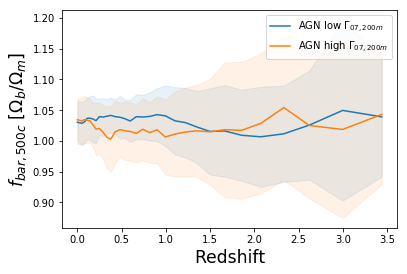

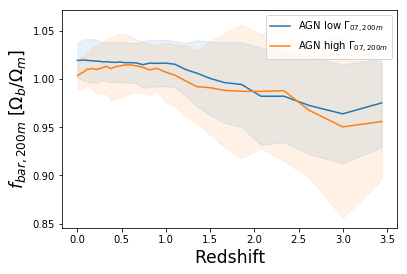

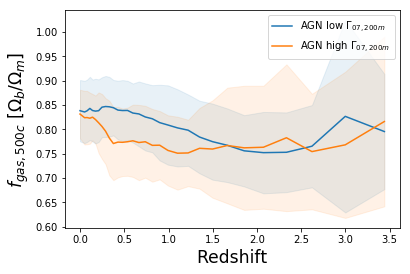

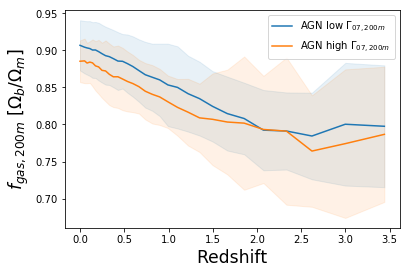

In [38]:
# Let's plot quantities where we can compare AGN, CSF
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

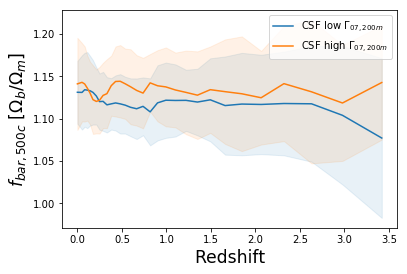

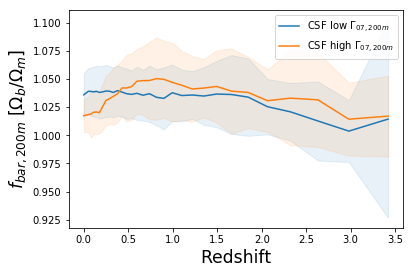

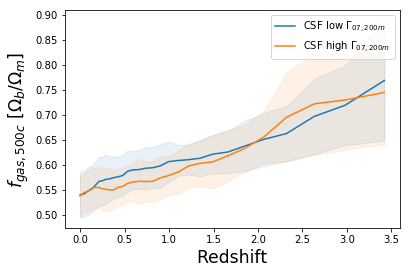

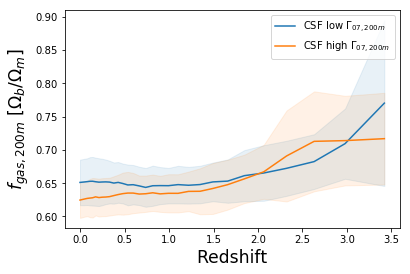

In [39]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

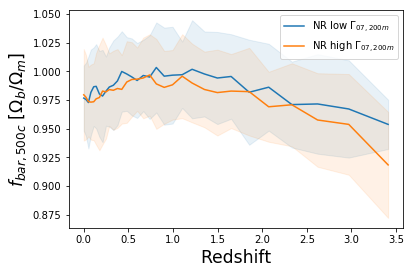

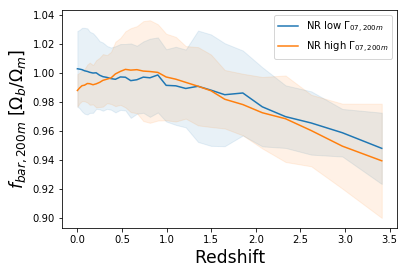

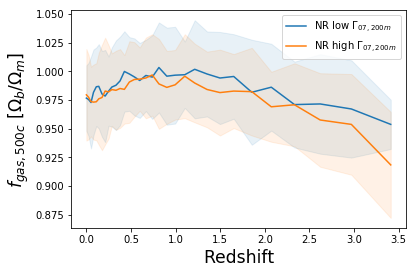

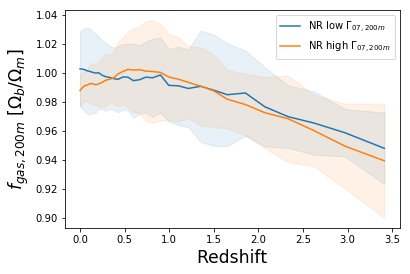

In [40]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

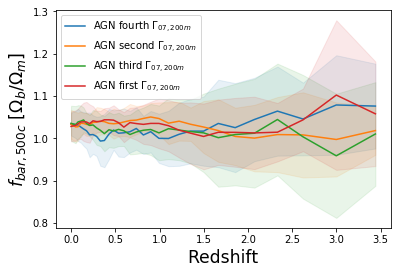

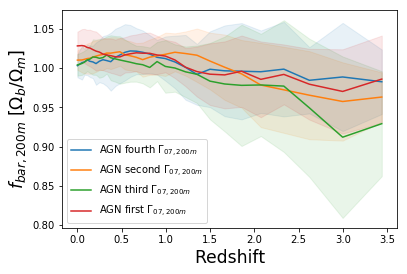

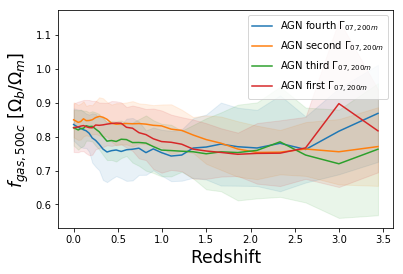

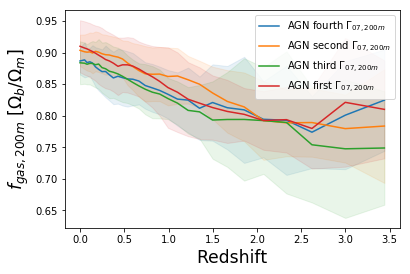

In [41]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

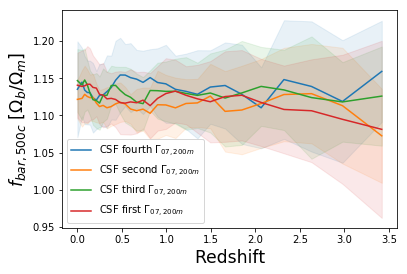

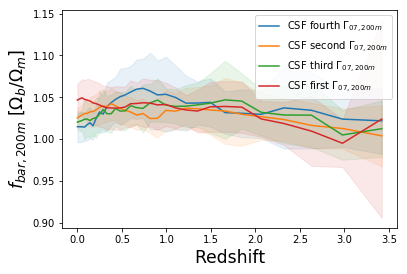

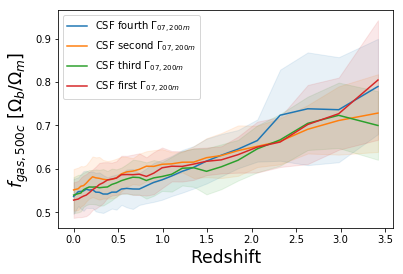

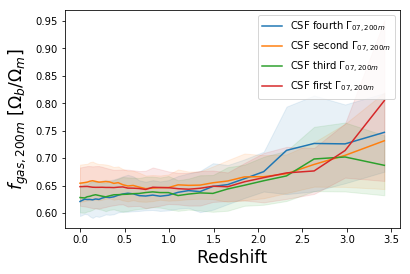

In [42]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

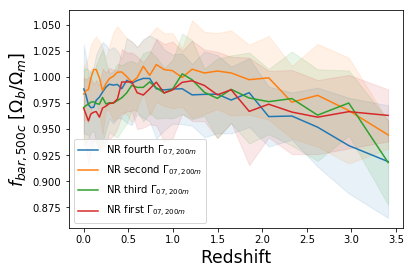

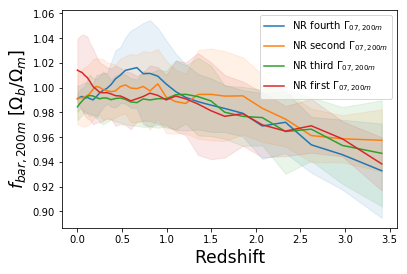

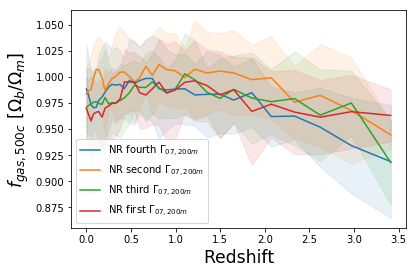

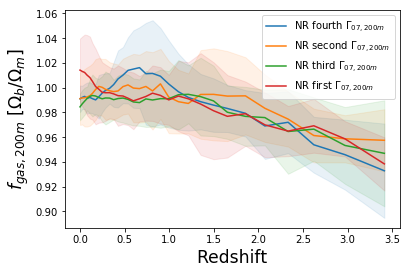

In [43]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

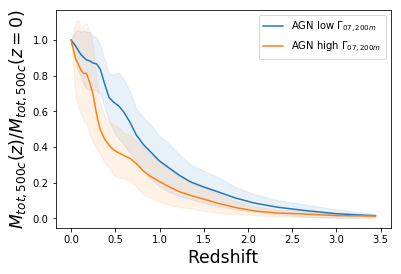

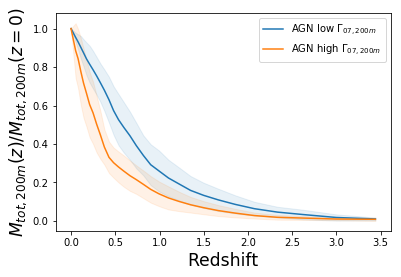

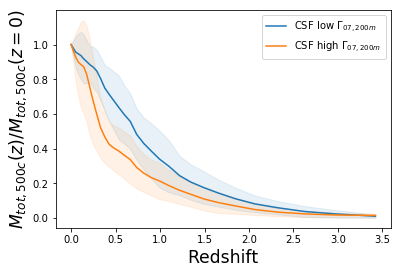

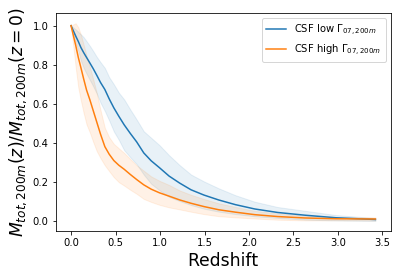

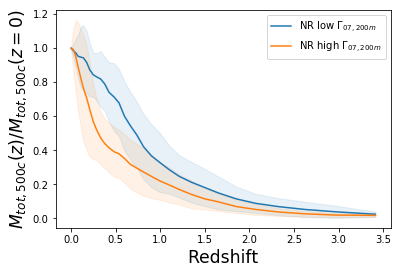

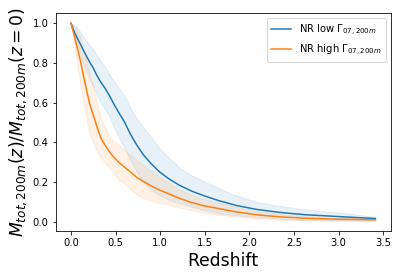

In [44]:
# Mass evolution
fields = ['z0_M_total_500c_fraction','z0_M_total_200m_fraction']
labels = ['$M_{tot,500c}(z)/M_{tot,500c}(z=0)$', '$M_{tot,200m}(z)/M_{tot,200m}(z=0)$']

# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()
    
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('median_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()


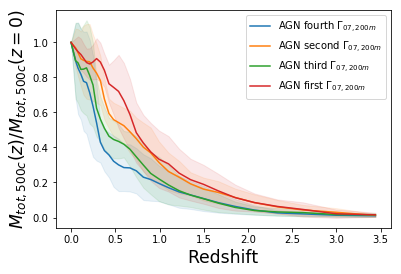

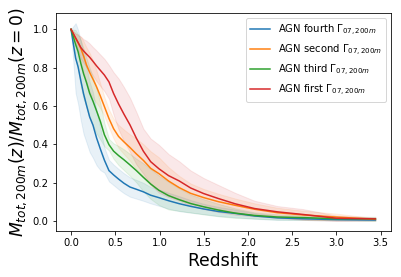

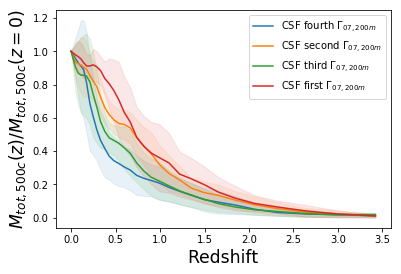

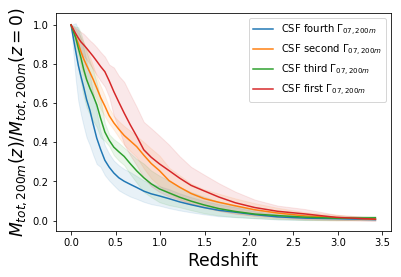

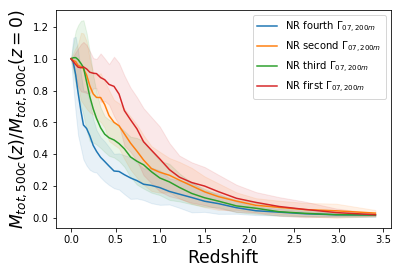

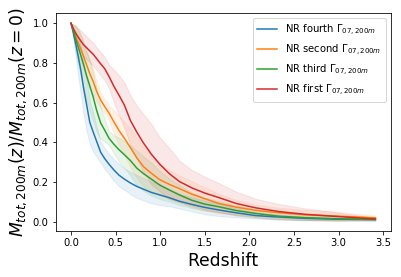

In [45]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()
    
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()

for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('quartile_Gamma07_M200m_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' $\\Gamma_{07,200m}$' for g in gbs], label)
    plt.show()


# Identify merger mode

Using the 'mergers' table/dataframe, need to identify maximum merger ratio after aexp=0.7, grouping by z0_parent_id. Create quantile cuts according to maximum merger ratio.

Will need to also do this at each aexp (look at max merger ratio in last ~4.5 Gyr).

# Halos selected by recent merger and history *at* each aexp.  It looks like the fgas and fbar values are systematically higher for low Gamma and low max merger ratio halos, but only within the timeframe of the $\Delta t$, and most noticeably for the $\Delta = 200m$ definition.  There should be a clearer separation at each redshift in this cut.

(1)  Need to find aexp corresponding to a delta_t ago

(2)  Need to find the mass at that delta_t ago

(3)  Need to find the $\Gamma_{4.5Gyr}$ at each aexp

In [46]:
# Need to find aexp pair that corresponds to ~4.5 Gyr ago.
def get_aexp_delta_t_ago(aexps_in_df, aexp_i, delta_t=4.5) :
    lookback_time_i = get_lookback_time(aexp_i)
    # aexps = np.unique(df['mergers']['merger_aexp'])
    lookback_times = get_lookback_time(aexps_in_df)
    delta_t_array = lookback_times - lookback_time_i
    # Find aexp where delta_t_aray is closest to delta_t
    aexp_closest = aexps_in_df[np.abs(delta_t_array - delta_t).argmin()]
    return aexp_closest

In [47]:
# Create dictionary for max merger ratio
def get_max_merger_ratio_in_aexp_range(df, aexp_min, aexp_max=1.0) :
    '''Return a dictionary that has keys (z0_parent_id, aexp_max) 
    and values that are the values of the merger mass ratios after aexp'''
    aexps = df.merger_aexp.unique()
    aexpi_min = aexps[np.abs(aexps - aexp_min).argmin()]
    aexpi_max = aexps[np.abs(aexps - aexp_max).argmin()]
    rows_in_aexp_range = (df['merger_aexp']>=aexpi_min) & (df['merger_aexp']<=aexpi_max)
    
    return df.loc[rows_in_aexp_range].set_index('z0_parent_id')['mass_ratio'].groupby('z0_parent_id').max().to_dict()

# Test
print(get_aexp_delta_t_ago(np.unique(AGN_df['mergers']['merger_aexp']), aexp_i=.5, delta_t=4.5))
###  NOTE: Only makes sense since aexp=0.5 (z=1), otherwise, no merger history more than 4.5 Gyr ago ###

# Create new columns 
for df in [AGN_df, NR_df] :
    # New columns for max merger ratio since aexp=0.7
    max_merger_ratio_07_dict = get_max_merger_ratio_in_aexp_range(df['mergers'], aexp_min=0.7, aexp_max=1.0)
    df['halos_and_mergertree']['max_07_merger_ratio'] = \
        df['halos_and_mergertree']['z0_parent_id'].map(max_merger_ratio_07_dict)

    # New column for max merger ratio since 4.5Gyr
    ###  EDITING HERE:  Need to use get_aexp_delta_t_ago to get the aexp_closest for each aexp_i, 
    #                   then can put that into aexp_max####
    
    
    # Create a column for maximum mergers
    df['halos_and_mergertree']['max_4_5Gyr_merger_ratio'] = \
        df['halos_and_mergertree'].apply(lambda x: get_max_merger_ratio_in_aexp_rante(df['halos_and_mergertree'], 
                                                                                      aexp_min=x['aexp_4_5_Gyr_ago'], 
                                                                                      aexp_max=x['aexp']), axis=1)
        
        
# Create cut on median max_merger_ratio
for df, df_name in zip([AGN_df['halos_and_mergertree'], NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_max_07_merger_ratio', groupby='aexp', 
                              column_to_cut='max_07_merger_ratio')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos_and_mergertree'], NR_df['halos_and_mergertree']],
                       ['AGN','CSF','NR']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_max_07_merger_ratio', 
                              groupby='aexp', 
                              column_to_cut='max_07_merger_ratio')


0.2006


NameError: ("name 'get_max_merger_ratio_in_aexp_rante' is not defined", 'occurred at index 0')

In [ ]:
# Create new columns 
for df in [AGN_df, NR_df] :
    # New columns for max merger ratio since aexp=0.7
    max_merger_ratio_07_dict = get_max_merger_ratio_in_aexp_range(df['mergers'], aexp_min=0.7, aexp_max=1.0)
    df['halos_and_mergertree']['max_07_merger_ratio'] = \
        df['halos_and_mergertree']['z0_parent_id'].map(max_merger_ratio_07_dict)
        
    # Create a column for aexps ~4.5 Gyr ago
    aexps_in_df = np.unique(df['mergers']['merger_aexp'])
    df['halos_and_mergertree']['aexp_4_5Gyr_ago'] = \
        df['halos_and_mergertree'].apply(lambda x: get_aexp_delta_t_ago(aexps_in_df, x['aexp'], delta_t=4.5), axis=1)


In [48]:
def mass_at_aexp_dict(df, masskey, z0_parent_id=None) :
    '''Return either a dictionary with aexp, M_total pairs for a given z0_parent_id
    OR
       Return a dictionary of dictionaries with z0_parent_id keys'''
    if z0_parent_id is not None :
        return df.loc[df['z0_parent_id']==z0_parent_id].set_index('aexp').to_dict()[masskey]
    elif z0_parent_id == 'all' :
        return { z0_pid: df.loc[df['z0_parent_id']==z0_pid].set_index('aexp').to_dict()[masskey]\
                    for z0_pid in np.unique(df.z0_parent_id) }
    else :
        return df.set_index('aexp').to_dict()[masskey]

In [49]:
def return_mass_at_aexp_column(df, masskey, aexp_at_time_key='aexp_4_5Gyr_ago') :
    '''Create another column of the masses at an aexp within timescale'''
    
    renamed_df = df[['aexp', masskey,'z0_parent_id']].rename(columns={'aexp':aexp_at_time_key,
                                                                      masskey:aexp_at_time_key+'_'+masskey})
    return df.merge(renamed_df, on=[aexp_at_time_key,'z0_parent_id'],how='left')[aexp_at_time_key+'_'+masskey]

#return_mass_at_aexp_column(AGN_df['halos_and_mergertree'],'M_total_200m')
'aexp_4_5Gyr_ago' in AGN_df['halos_and_mergertree'].columns

False

In [58]:
# Test transform - want to get new column mass_45 (Mass of progenitor ~4.5 Gyr ago)
dftest = pd.DataFrame.from_dict({'z0':[1,1,1,1,1],'aex':[1,2,3,4,5], 'aex_45':[3,4,5,5,5], 'mass': [40,50,20,10,30]})

renamed = dftest[['aex','mass','z0']].rename(columns={'aex':'aex_45', 'mass':'mass_45'})
print(renamed)
print(dftest)
test_merged = dftest.merge(renamed,on=['aex_45','z0'],how='left')
print(dftest)
print(test_merged['mass_45'])
###  THIS WORKS, need to now do this for AGN and NR (where I have mergertree info)  ###

   aex_45  mass_45  z0
0       1       40   1
1       2       50   1
2       3       20   1
3       4       10   1
4       5       30   1
   aex  aex_45  mass  z0
0    1       3    40   1
1    2       4    50   1
2    3       5    20   1
3    4       5    10   1
4    5       5    30   1
   aex  aex_45  mass  z0
0    1       3    40   1
1    2       4    50   1
2    3       5    20   1
3    4       5    10   1
4    5       5    30   1
0    20
1    10
2    30
3    30
4    30
Name: mass_45, dtype: int64


In [56]:
mass_at_aexp_dict(AGN_df['halos_and_mergertree'], 'M_total_200m', z0_parent_id=3)

return_mass_at_aexp_column(AGN_df['halos_and_mergertree'], 'M_total_200m',aexp_at_time_key='aexp_4_5Gyr_ago')
print(AGN_df['halos_and_mergertree'][['aexp_4_5Gyr_ago', 'aexp_4_5Gyr_ago_M_total_200m']])

KeyError: "['aexp_4_5Gyr_ago_M_total_200m'] not in index"

In [52]:
def get_mass_at_aexp_of_z0_parent_id(df, masskey, aexp, z0_parent_id) :
    return get_aexp_masses(df, masskey, aexp)[z0_parent_id]

# Testing functions

AGN_df['halos_and_mergertree'].columns
aexps_in_df = np.unique(AGN_df['mergers']['merger_aexp'])
#print(aexps_in_df)
#print(AGN_df['halos_and_mergertree']['aexp'])
AGN_df['halos_and_mergertree']['aexp_4_5Gyr_ago']=\
    AGN_df['halos_and_mergertree'].apply(lambda x: get_aexp_delta_t_ago(aexps_in_df, x['aexp'], delta_t=4.5), axis=1)

print(AGN_df['halos_and_mergertree'][['aexp','aexp_4_5Gyr_ago','z0_parent_id','is_main_line','M_total_200m']])

get_aexp_masses(AGN_df['halos_and_mergertree'], 'M_total_200m', aexp=1.)[3]
# groupby z0_parent_id, collect M_total_200m to find

#AGN_df['halos_and_mergertree']['M_200m_4_5Gyr_ago'] = \
#AGN_df['halos_and_mergertree'].apply(lambda x: get_mass_at_aexp_of_z0_parent_id(AGN_df['halos_and_mergertree'], 
#                                                                   'M_total_200m', .7 ,x['z0_parent_id']))


#AGN_df['halos_and_mergertree'].loc[rows_in_aexp_range].set_index('z0_parent_id')['mass_ratio'].groupby('z0_parent_id').max()

        aexp  aexp_4_5Gyr_ago  z0_parent_id  is_main_line  M_total_200m
0     1.0008           0.7001             3             1  9.079200e+14
1     1.0008           0.7001             5             1  7.270500e+14
2     1.0008           0.7001             6             1  6.900500e+14
3     1.0008           0.7001             9             1  7.929800e+14
4     1.0008           0.7001            10             1  1.164800e+15
5     1.0008           0.7001            13             1  1.619200e+15
6     1.0008           0.7001            14             1  7.980500e+14
7     1.0008           0.7001            16             1  1.013900e+15
8     1.0008           0.7001            17             1  1.723000e+15
9     1.0008           0.7001            18             1  8.142000e+14
10    1.0008           0.7001            20             1  6.423400e+14
11    1.0008           0.7001            21             1  8.563400e+14
12    1.0008           0.7001            23             1  9.586

907920000000000.0

In [53]:
# Let's plot quantities where we can compare AGN, CSF, and NR
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_max_07_merger_ratio')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' recent merger ratio' for g in gbs], label)
    plt.show()

KeyError: 'median_max_07_merger_ratio'

In [54]:
# Let's plot quantities where we can compare AGN, CSF, and NR
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = NR_df['halos_and_mergertree'].groupby('median_max_07_merger_ratio')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['NR '+g[0]+' merger ratio' for g in gbs], label)
    plt.show()

KeyError: 'median_max_07_merger_ratio'

In [ ]:
1/.7